In [0]:
from copy import deepcopy

import numpy as np
import seaborn as sb
import pandas
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_boston
from sklearn.linear_model import LinearRegression, RidgeClassifier, LogisticRegression, Lasso
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, StratifiedKFold
from pylab import scatter, show, legend, xlabel, ylabel
%matplotlib inline

# *K*-means Clustering

*K*-means is a very simple algorithm which clusters the data into *K* number of clusters.


-Algorithm

Assume that we have inputs $x_1, x_2, x_3, ..., x_n$ and value of *K*.

**Step 1**: Pick *K* random points as cluster centers called centroids.

$$C=c_1,c_2,...,c_k$$ 

**Step 2**: Assign each $x_i$ to nearest cluster by calculating its distance to each centroid. 

$$\arg\min_{c_i\in C}{dist(c_i,x)^2}$$

**Step 3**: Find new cluster center by taking the average of the assigned points.

$$c_i=\dfrac{1}{|S_i|}\sum_{x_i\in S_i}x_i$$

**Step 3**: Repeat **Step 2** and **Step 3** until none of the cluster assignments change.

### Norm
$$L_p=(\sum_i^n|x_i|^p)^{\frac{1}{p}}$$

-**L1 Norm** (*Taxicab Norm* or *Manhattan norm*)
$$L_1=(\sum_i^n|x_i|)=|x_1|+|x_2|+|x_3|+...+|x_n|$$

In [0]:
## K-means 

# 1. clustering
# 2. compute the mean and standard deviation for RBF


class kmeans(object):
  
    def __init__(self, k): 
        self.k = k  
      
    
    # calculate Euclidean distance
    def dist(self, a, b, ax=1):
        return np.linalg.norm(a-b, axis=ax)
      
    
    def doClustering(self, X):
      
        # X coordinates of random centroids
        C_x = np.random.choice(X.ravel(), size=self.k)  # generate a random sample from a given 1-D array
    
        # Y coordinates of random centroids
        if X.shape[1]>1:
            C_y = np.random.choice(X.ravel(), size=self.k)
            C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
        else:
            C = C_x.reshape(len(C_x),1)
        
        # store the value of centroids when it updates
        C_old = np.zeros(C.shape)

        # cluster lable set
        clusters = np.zeros(X.shape[0])
        
        # distance between new centroids and old centroids
        cond = self.dist(C, C_old, None)

        # run till the error arrives epsilon value
        epsilon = 1e-6
        
        while cond > epsilon:
          
            # assign each value to its closest cluster
            for i in range(len(X)):
                distances = self.dist(X[i], C)
                clusters[i] = np.argmin(distances)
                
            # store the old centroid values
            C_old = deepcopy(C)
        
            # find the new centroids by taking the average value
            for i in range(self.k):
                points = [X[j] for j in range(len(X)) if clusters[j] == i]
                C[i] = np.mean(points, axis=0)
                
            cond = self.dist(C, C_old, None)
        
        
        pointsPerCluster = []
        for i in range(self.k):
            points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
            pointsPerCluster.append(points)
                
        ## visualize for multi-dimensional case    
        if X.shape[1] > 1:  
            colors = ['r', 'g', 'b', 'y', 'c', 'm']
            fig, ax = plt.subplots()
            
            for i in range(self.k):
                points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
                ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
            ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

        return C, pointsPerCluster
        
      
    def doRBF(self, X):
      
        clusters = np.zeros(self.k)
        stds = np.zeros(self.k)
        
        C, pointsPerCluster = self.doClustering(X)
        
        for i in range(self.k):
            clusters[i] = C[i]
            stds[i] = np.mean(np.std(pointsPerCluster[i]))
           
        return clusters, stds   

In [0]:
def simulateData(numData1=100, numData2=100, numData3=100):
#     mu1 = [-5, -5]
#     mu2 = [0, 0]
#     mu3 = [10, -10]

    mu1 = [-2, -2]
    mu2 = [0, 0]
    mu3 = [2, -2]
    
    cov1 = [[1, 0], [0, 1]]
    cov2 = [[2, 0], [0, 1]]
    cov3 = [[1, 0], [0, 2]]
    
    data1 = np.random.multivariate_normal(mu1, cov1, numData1)
    data2 = np.random.multivariate_normal(mu2, cov2, numData2)
    data3 = np.random.multivariate_normal(mu3, cov3, numData3)
    
    return data1, data2, data3

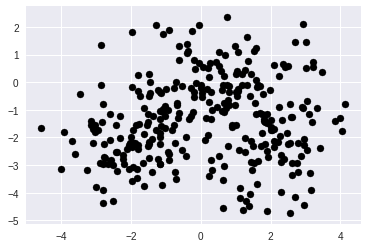

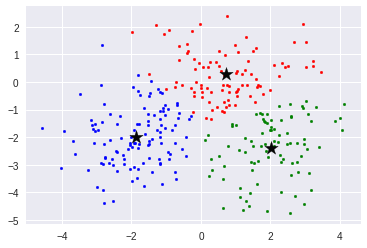

In [347]:
## Clustering example

clsData1, clsData2, clsData3 = simulateData(100, 100)

X = np.vstack((clsData1, clsData2, clsData3))
y = np.concatenate((np.zeros((len(clsData1),1)), np.ones((len(clsData2),1)), 2*np.ones((len(clsData3),1))))


## original unclustered data
scatter(X[:,0],X[:,1],marker='o', c='k')
show()

## clustered data by k-means clustering
mykmeans = kmeans(k=3)
C, std = mykmeans.doClustering(X)

# Using Neural Networks for Regression or Classification

Radial Basis Function (RBF) is used for exact **regression or function approximation**. RBF nets can learn to approximate the underlying trend using many *bell curves*.

An RBF  is similar to a **2-layer network**. We have an input that is fully connected to a hidden layer. Then, we take the output of the hidden layer by performing a weighted sum.

But what is that inside the hidden layer neurons? That is a **Gaussian RBF**! This differentiates an RBF net from a regular neural network: we’re using an RBF as our “activation” function (more specifically, a Gaussian RBF).

We can use a linear combination of Gaussians to approximate any function! When we take the sum, we get a continuous function! To do this, we need to know **1) where to place the Gaussian centers $c_j$** and **2) their standard deviations $\sigma_j$**.

**1) where to place the Gaussian centers $c_j$**
We can use ***k*-means clustering** on our input data to figure out where to place the Gaussians. The reasoning behind this is that we want our Gaussians to “span” the largest clusters of data since they have that bell-curve shape.

**2) their standard deviations $\sigma_j$**
There are two approaches we can take: *set the standard deviation to be that of the points assigned to a particular cluster $c_j$* or we can use *a single standard deviation for all clusters* $\sigma_j = \sigma \forall j$ where $\sigma=\frac{d_\text{max}}{\sqrt{2k}}$ where $d_\text{max}$ is the maximum distance between any two cluster centers, and $k$ is the number of cluster centers.


How many Gaussians do we use? That’s a *hyperparameter* called the number of bases or kernels $k$.

$$ F(x)=\sum_{j=1}^{k}{w_{j}\varphi_{j}(x,c_j)+b}$$
where $w_j$ are the weights, $b$ is the bias, $k$ is the number of bases/clusters/centers, and $\varphi_{j}(\cdot)$ is the Gaussian RBF:
$$\varphi_{j}(x,c_j)=\text{exp}\left(\frac{-||x-c_j||^2}{2\sigma^2_j}\right)$$

In [0]:
## Regression or classification using radial basis function 

class RBF(object):
  
    """Implementation of a Radial Basis Function Network"""
    
    def __init__(self, k=2, lr=0.01, epochs=3000, inferStds=True, isRegress=True, numClass=2):
        
        self.k = k
        self.lr = lr
        self.epochs = epochs
        self.inferStds = inferStds       
        self.isRegress = isRegress
        self.numClass = numClass
        
        self.mymodel = []
        
        if self.isRegress:  # for regression case
            self.mymodel = myLinearRegressor(eta=self.lr, epochs=self.epochs, numDim=self.k+1)
        else:  # for classification case
            self.mymodel = myLogisticRegressor(eta=self.lr, epochs=self.epochs, numDim=self.k+1, numClass=numClass)
        

    def fit(self, X,y):
      if self.inferStds:
          ## compute stds from data
          Dokmeans = kmeans(self.k)
          self.centers, self.stds = Dokmeans.doRBF(X.reshape(len(X),-1))
          
      else:
          ## use a fixed std
          Dokmeans = kmeans(self.k)
          self.centers, _ = Dokmeans.doRBF(X.reshape(len(X),-1))
          dMax = max([np.abs(c1-c2) for c1 in self.centers for c2 in self.centers])
          self.stds = np.repeat(dMax / np.sqrt(2*self.k), self.k)

      ## training
      a = np.array([self.rbf(X, c, s) for c, s, in zip(self.centers, self.stds)]).T  # Gaussian RBF
      a = np.hstack((a, np.ones((a.shape[0],1))))  # add bias
      self.mymodel.fit(a, y)

    
    def rbf(self, X, c, s):
      return np.exp(-1/(2*s**2) *(X-c)**2)
            
            
    def predict(self, X):
      a = np.array([self.rbf(X, c, s) for c, s, in zip(self.centers, self.stds)]).T
      a = np.hstack((a, np.ones((a.shape[0],1))))
      
      y_pred = self.mymodel.predict(a)
                    
      return y_pred

We have options for **the number of bases, learning rate, number of epochs, which RBF to use, and if we want to use the standard deviations from *k*-means**. 

We also initialize the weights and bias.

We can derive the update rules for $w_j$ and $b$ for **gradient descent**. We use the **quadratic cost function** to minimize.

$$C=\sum_{i=1}^{N}{(y^{(i)}-F(x^{(i)})^2}$$

We can derive the update rule for $w_j$ by computing the **partial derivative of the cost function** with respect to all of the $w_j$.

$$\frac{\partial C}{\partial w_j}=\frac{\partial C}{\partial F}\cdot\frac{\partial F}{\partial w_j}\\
=\frac{\partial }{\partial F}[\sum_{i=1}^N (y^{(i)}-F(x^{(i)})^2]\cdot\frac{\partial }{\partial w_j}[\sum_{j=0}^K w_j\varphi_j(x,c_j) + b]\\
=-(y^{(i)}-F(x^{(i)})\cdot\varphi_j(x,c_j)\\ 
\therefore w_j \gets w_j + \eta(y^{(i)}-F(x^{(i)})\varphi_j(x,c_j)$$ 

Similarly, we can derive the update rules for $b$ by computing the **partial derivative of the cost function** with respect to $b$.

$$\frac{\partial C}{\partial b} = \frac{\partial C}{\partial F}\cdot \frac{\partial F}{\partial b}\\ =\frac{\partial }{\partial F}[\displaystyle\sum_{i=1}^N (y^{(i)}-F(x^{(i)})^2]\cdot\frac{\partial }{\partial b}[\sum_{j=0}^K w_j\varphi_j(x,c_j) + b]\\ =-(y^{(i)}-F(x^{(i)})\cdot 1\\ 
\therefore b \gets b + \eta(y^{(i)}-F(x^{(i)})$$

Now we have our **backpropagation rules**!

In [0]:
class myLinearRegressor(object):
  
    """Implementation of a Binary Class Logistic Regression"""
    
    
    def __init__(self, eta, epochs, numDim):
      self.eta = eta  # learning rate
      self.epochs = epochs  # the number of epochs
      self.theta = []
      self.initTheta(numDim)
      
      
    def initTheta(self, numDim):
      ## make the theta be random values from a uniform distribution over [0, 1)
      self.theta = np.random.rand(numDim).reshape([-1,numDim]) 
        
        
    def fit(self, X, y, init=True, verbose=True):
      if init==True:
        self.initTheta(len(X[0]))  #  (1  X  # of the features)
        
      for i in range(self.epochs):
          self.gradientDescent(X, y) 
     
    
    def gradientDescent(self, X, y):
      CFDerivative = self.Cost_Function_Derivative(X, y)
      self.theta = self.theta - float(self.eta)*CFDerivative
    
   
    ## calculate a gradient value by taking the gradient of the cost function
    def Cost_Function_Derivative(self, X, y):
      h = self.hypothesis(X)

      error = (h-y) * X
      gradient = np.sum(error, axis=0)

      J = (1/float(len(y))) * gradient
      return J 
      
      
    def hypothesis(self, X):
      h = np.dot(X, self.theta.T)
      return h.reshape(len(h),1)
    
    
    def predict(self, X):
      return self.hypothesis(X)
    
       
    def plot_decision_regions(self, X, y, numDim, resolution=0.02):
      ## setup marker generator and color map
      markers = ('s', 'x', 'o', '^', 'v')
      colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
      cmap = ListedColormap(colors[:len(np.unique(y))])

      ## plot the decision surface
      x1_min, x1_max = X[:,0].min() - 1, X[:,0].max()+1
      x2_min, x2_max = X[:,1].min() - 1, X[:,1].max()+1
      xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
      
      data = np.array([xx1.ravel(), xx2.ravel()]).T
      if numDim>2:
        data = np.hstack((data, np.ones((len(data[:,1]), 1))))
        
      Z = self.predict(data)
      Z = Z.reshape(xx1.shape)
      
      plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)  # draw filled contours
      plt.xlim(xx1.min(), xx1.max())
      plt.ylim(xx2.min(), xx2.max())

      # plot class samples
      labelSet = ['class 1', 'class 2']
      for idx, c1 in enumerate(np.unique(y)):
          classidx = np.where(y==c1)
          plt.scatter(x=X[classidx,0], y=X[classidx,1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=labelSet[idx])
          
      plt.show()

In [0]:
class myLogisticRegressor(object):
  
    """Implementation of a Logistic Regression"""
    
    def __init__(self, eta, epochs, numDim, numClass):
      self.eta = eta
      self.epochs = epochs
      self.theta = []
      self.initTheta(numDim, numClass)
      
      
    def initTheta(self, numDim, numClass):
      self.theta = np.random.rand(numDim*numClass).reshape([numDim, numClass])

        
    def fit(self, X, y, init=True, verbose=False):
      if init==True:
        self.initTheta(len(X[1,:]), len(np.unique(y)))
        
      costSet = []
      for i in range(self.epochs):
          self.gradientDescent(X, y)
          cost = self.Cost_Function(X, y)
          costSet.append(cost)
      
      if verbose==True:
          print(np.array(costSet).T)
        # plt.plot(range(1,len(costSet)+1), np.array(costSet), marker='o')
        # plt.xlabel('Epochs')
        # plt.ylabel('Cost')
        # plt.show()
         
    def gradientDescent(self, X, y):
      CFDerivative = self.Cost_Function_Derivative(X, y)
      self.theta = self.theta - float(self.eta)*CFDerivative
    
    
    def convertClassIndicator(self, y):
      classes = np.unique(y).astype(int)
      labels = np.zeros( (len(y), len(classes)) )
      for i in classes:
        pos = np.where(y==i)
        idx = pos[0]
        labels[idx, i] = 1

      return labels
   
  
    def Cost_Function_Derivative(self, X, y):
      h = self.hypothesis(X)
      
      target = self.convertClassIndicator(y)
      gradient = np.dot((h-target).T, X).T

      J = (1/float(len(y))) * gradient
      return gradient
      
      
    def Cost_Function(self, X, y):
      h = self.hypothesis(X)
      
      target = self.convertClassIndicator(y)
      error = np.dot(target, np.log(h).T)
      sumOfErrors = np.sum(error)

      J = (-1/float(len(y))) * sumOfErrors
      return J   
      
      
    def hypothesis(self, X):
      z = np.dot(X, self.theta)
      h = Softmax(z)
      return h
    
    
    def predict(self, X):
      return np.argmax(self.hypothesis(X), 1)
        
    
    def plot_decision_regions(self, X, y, numDim, resolution=0.02):
      # setup marker generator and color map
      markers = ('s', 'x', 'o', '^', 'v')
      colors = ('blue', 'red', 'lightgreen', 'gray', 'cyan')
      cmap = ListedColormap(colors[:len(np.unique(y))])

      # plot the decision surface
      x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
      x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1

      xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
      
      
      data = np.array([xx1.ravel(), xx2.ravel()]).T
      if numDim>2:
        data = np.hstack((data, np.ones((len(data[:,1]), 1))))
        
        
      Z = self.predict(data)

      Z = Z.reshape(xx1.shape)
      plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
      plt.xlim(xx1.min(), xx1.max())
      plt.ylim(xx2.min(), xx2.max())

      # plot class samples
      labelSet = ['class 1', 'class 2', 'class 3']
      for idx, c1 in enumerate(np.unique(y)):
          classidx = np.where(y == c1)[0]
          plt.scatter(x=X[classidx,0], y=X[classidx,1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=labelSet[idx])
          
      plt.show()

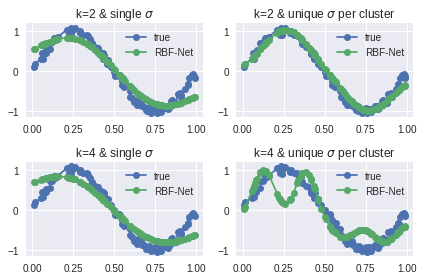

In [327]:
## Regression 

## sample inputs and add noise
NUM_SAMPLES = 100
X = np.random.uniform(0., 1., NUM_SAMPLES)
X = np.sort(X, axis=0)
noise = np.random.uniform(-0.1, 0.1, NUM_SAMPLES)
y = np.sin(2*np.pi*X) + noise
y = y.reshape(len(y),1)


## compare the following 4 cases
# case 1: k=2 & single standard deviation for all clusters
rbfnet1 = RBF(k=2, lr=0.01, inferStds=False, isRegress=True)
rbfnet1.fit(X, y)
y_pred_1 = rbfnet1.predict(X)

# case 2: k=2 & unique standard deviation per cluster
rbfnet2 = RBF(k=2, lr=0.01, inferStds=True, isRegress=True)
rbfnet2.fit(X, y)
y_pred_2 = rbfnet2.predict(X)

# case 3: k=4 & single standard deviation for all clusters
rbfnet3 = RBF(k=4, lr=0.01, inferStds=False, isRegress=True)
rbfnet3.fit(X, y)
y_pred_3 = rbfnet3.predict(X)

# case 4: k=4 & unique standard deviation per cluster
rbfnet4 = RBF(k=4, lr=0.01, inferStds=True, isRegress=True)
rbfnet4.fit(X, y)
y_pred_4 = rbfnet4.predict(X)


## plot the approximated function against the real function 
## to see how well the RBF net performed
plt.subplot(2,2,1)
plt.plot(X, y, '-o', label='true')
plt.plot(X, y_pred_1, '-o', label='RBF-Net')
plt.title('k=2 & single $\sigma$')
plt.legend()

plt.subplot(2,2,2)
plt.plot(X, y, '-o', label='true')
plt.plot(X, y_pred_2, '-o', label='RBF-Net')
plt.title('k=2 & unique $\sigma$ per cluster')
plt.legend()

plt.subplot(2,2,3)
plt.plot(X, y, '-o', label='true')
plt.plot(X, y_pred_3, '-o', label='RBF-Net')
plt.title('k=4 & single $\sigma$')
plt.legend()

plt.subplot(2,2,4)
plt.plot(X, y, '-o', label='true')
plt.plot(X, y_pred_4, '-o', label='RBF-Net')
plt.title('k=4 & unique $\sigma$ per cluster')
plt.legend()

plt.tight_layout()
plt.show()

**How about we use a single standard deviation for all of our bases instead of each one getting its own?**
Our plot is much smoother! This is because the Gaussians that make up our reconstruction all have the same standard deviation.

**What if we increase the number of bases to 4?**
Our results aren’t too great! This is because our original function is shaped the way that it is two bumps. If we had a more complicated function, then we could use a larger number of bases. If we used a large number of bases, then we’ll start *overfitting*!

There are other parameters we can change like the *learning rate*; we could use a more advanced optimization algorithm; we could try layering Gaussians; etc.

In [0]:
## Homework: Classification 
clsData1, clsData2, clsData3 = simulateData(100, 100)

X = np.vstack((clsData1, clsData2, clsData3))
y = np.concatenate((np.zeros((len(clsData1),1)), np.ones((len(clsData2),1)), 2*np.ones((len(clsData3),1))))

rbfnet_cls = RBF(k=3, lr=0.01, inferStds=True, isRegress=False, numClass=3)